# Define Problem

<strong>Twitter</strong> has emerged as a critical communication platform for peopele to provide immediate updates on potentially disastrous events.Various organizations, including disaster relief agencies and news outlets, are increasingly interested in programmatically monitoring Twitter to identify and respond to potential disasters promptly. However, <strong>identifing genuine disaster-related tweets from huge amount of tweets remains a significant challenge.</strong><br>

The primary <strong>objective</strong> of this project is to build a robust machine learning model capable of <strong>classifying</strong> tweets as either disaster-related or non-disaster-related with a high degree of accuracy. The model should help disaster relief organizations and news agencies quickly identify and prioritize tweets that are relevant to real emergencies.

# 1. EDA

In [1]:
#basic 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 1.1 import data

In [2]:
## Import original data
train_df = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv',encoding='UTF-8')
test_df = pd.read_csv('/kaggle/input/nlp-getting-started/test.csv',encoding='UTF-8')


In [3]:
display(train_df.sample(5))
print()
print()
display(test_df.sample(5))

,id,keyword,location,text,target
5301,7571,outbreak,Eagle River Alaska,New York City Outbreak: What Is Legionnaire's ...,1
1237,1780,buildings%20on%20fire,"Auburn, AL",Ton of smoke coming out of one of the new apar...,1
3950,5617,flooding,USA,Severe Thunderstorms and Flash Flooding Possib...,1
6490,9278,sunk,NYC,&lt;&lt; his lip as he sunk into the bed his a...,0
1708,2464,collided,Oregon,Reading for work has collided with reading for...,0


,id,keyword,location,text
2921,9676,tornado,NaN,http://t.co/Dg0EcBYKJL Tornado warnings end af...
2998,9908,trouble,NaN,@TitusOReily He's not responsible for the trou...
2308,7710,panicking,"Philadelphia, PA",I deserve a goddamn medal for dealing with thi...
2397,8014,refugees,Nigeria,12000 Nigerian refugees repatriated from Camer...
2071,6958,massacre,University of Maryland,3 Years After the Sikh Temple Massacre Hate-Vi...


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        3263 non-null   int64 
 1   keyword   3237 non-null   object
 2   location  2158 non-null   object
 3   text      3263 non-null   object
dtypes: int64(1), object(3)
memory usage: 102.1+ KB


## 1.2 check and remove duplicates

In [6]:
# check duplicates in column text
duplicates = train_df.duplicated(subset=['text'], keep=False)
train_df[duplicates].sort_values(by="text")

,id,keyword,location,text,target
4290,6094,hellfire,"Jubail IC, Saudi Arabia.",#Allah describes piling up #wealth thinking it...,0
4299,6105,hellfire,?????? ??? ?????? ????????,#Allah describes piling up #wealth thinking it...,0
4312,6123,hellfire,?????? ???? ??????,#Allah describes piling up #wealth thinking it...,1
6363,9095,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
6373,9107,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1
...,...,...,...,...,...
6091,8698,sinking,Every Where in the World,that horrible sinking feeling when youÛªve be...,1
6103,8714,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
6094,8702,sinking,NaN,that horrible sinking feeling when youÛªve be...,0
5641,8044,refugees,NaN,wowo--=== 12000 Nigerian refugees repatriated ...,0


In [7]:
#remove duplicates: keep only the first column if duplicated
train_df.drop_duplicates(subset=['text'], inplace=True)
len(train_df)

7503

## 1.3 check and remove missing values in text and target

          # missing  # total  percentage(%)
id                0     7503       0.000000
keyword          56     7503       0.007464
location       2482     7503       0.330801
text              0     7503       0.000000
target            0     7503       0.000000


<BarContainer object of 5 artists>

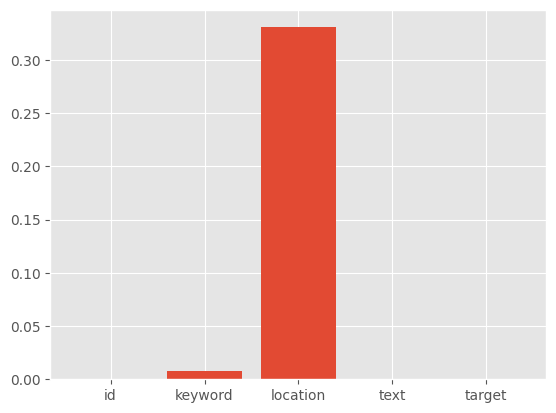

In [8]:
# check missing values, especially in 'text' and 'target'
missing_df = pd.DataFrame({"# missing": train_df.isna().sum()})
missing_df['# total'] = len(train_df)
missing_df['percentage(%)'] = missing_df["# missing"]/missing_df['# total']
print(missing_df)
plt.style.use('ggplot')
plt.bar(x=missing_df.index, height = missing_df['percentage(%)'])


## 1.4 class balance

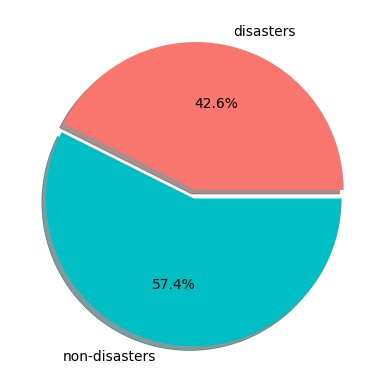

In [9]:
# check class balance
positive = round(train_df['target'].sum()/len(train_df),3)
negative = round(1 - positive,3)
z = plt.pie(x=[positive, negative], labels=['disasters', 'non-disasters'],explode=[0.03, 0.03], colors=['#F8766D', '#00BFC4'], autopct='%1.1f%%', shadow=True, startangle=0)


# 3. Modeling

## 3.1 TFIDF-logistic regression as a baseline

In [10]:
# need a lot of preprocessing


## 3.2 BERT classifier

### 3.2.1 preprocessing

In [11]:
# TODO

# remove @metions

# remove urls

# remove emojis

# remove punctuations


### 3.2.2 Tokenization and input formatting

In [12]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, AdamW, BertConfig, get_linear_schedule_with_warmup
from torch.utils.data import TensorDataset, random_split, DataLoader, RandomSampler, SequentialSampler

In [13]:
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

In [14]:
# convert to numpy array
train_tweets = train_df['text'].values
labels = train_df['target'].values

### format Twwets text
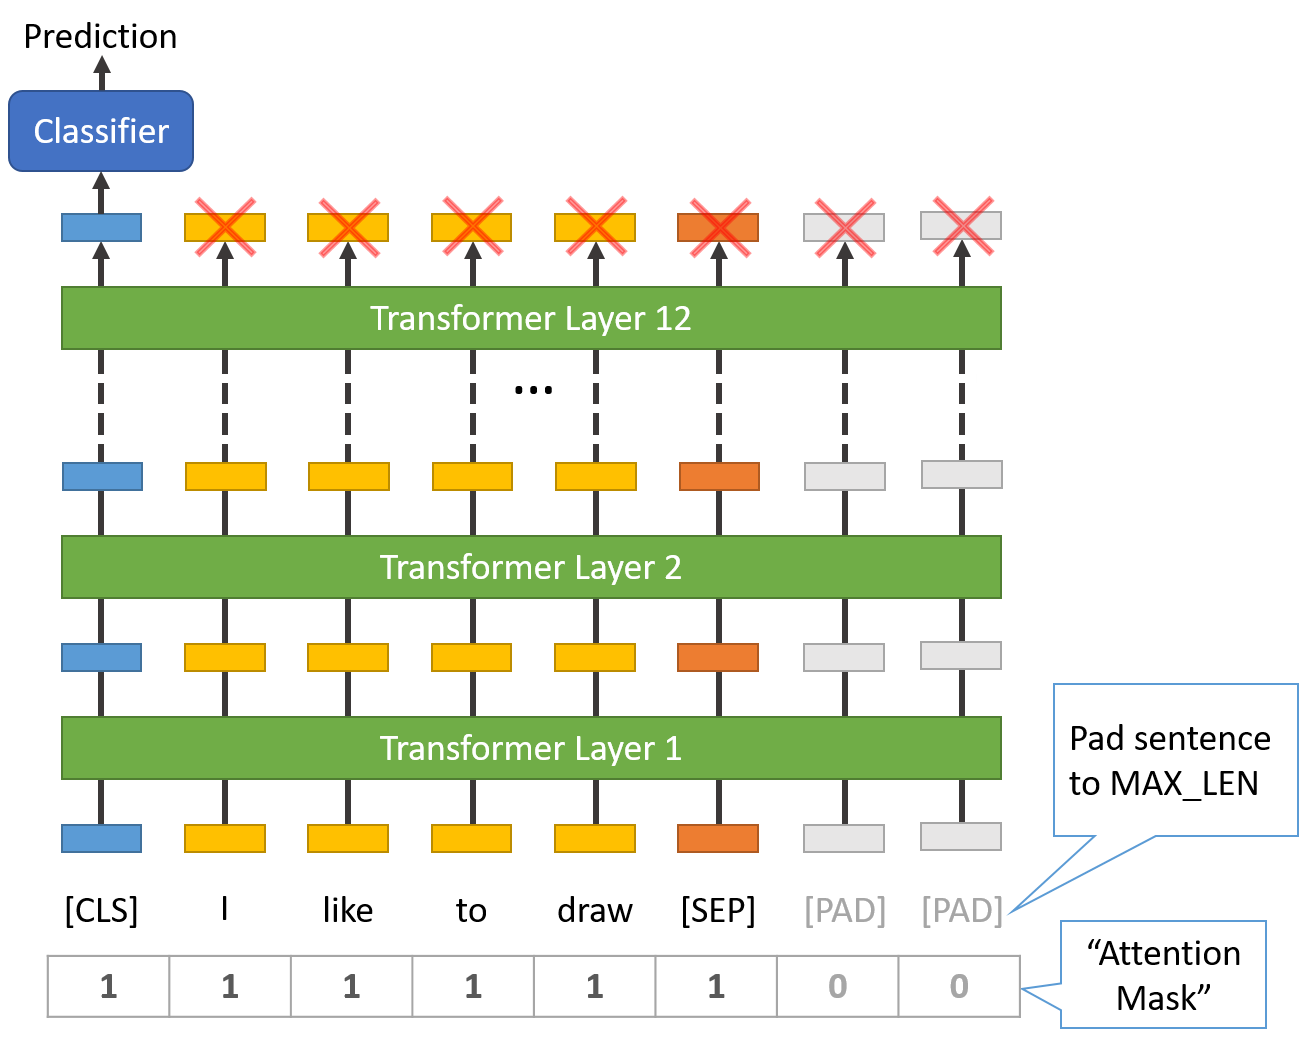

In [15]:
# Tokenize all of the sentences and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every sentence...
for text in train_tweets:
    # `encode_plus` will:
    #   (1) Tokenize the sentence.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the sentence to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        text,                      # Sentence to encode.
                        add_special_tokens = True, ## Prepend '[CLS]' and '[SEP]'
                        truncation=True,
                        max_length = 94,           # Pad & truncate all sentences.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded sentence to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])
    
    

/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:2418: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [16]:
# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(labels)

#### Train-Validation Split

In [17]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
tensor_dataset = TensorDataset(input_ids, attention_masks, labels)

# Divide the dataset by randomly selecting samples: 80-20.
train_size = int(0.8 * len(tensor_dataset))
val_size = len(tensor_dataset) - train_size 
train_dataset, val_dataset = random_split(tensor_dataset, [train_size, val_size])

In [18]:
# DataLoader: load the data into model by batches
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and validation sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For validation the order doesn't matter, so we'll just read them sequentially.
validation_dataloader = DataLoader(
            val_dataset, # The validation samples.
            sampler = SequentialSampler(val_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

In [19]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

In [20]:
# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 

model = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.
                    # You can increase this for multi-class tasks.   
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)

# Tell pytorch to run this model on the GPU.
device = torch.device("cuda")
model.cuda()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [21]:
# !pip install torchsummary
# from torchsummary import summary
# summary(model,input_size=(768,),depth=1,batch_dim=1, dtypes=[‘torch.IntTensor’])


In [22]:
# set optimizer
# Adam algorithm with weight decay fix as introduced in Decoupled Weight Decay Regularization.
optimizer = AdamW(
                  model.parameters(),
                  lr = 5e-5, # args.learning_rate - default is 5e-5
                  eps = 1e-8 # args.adam_epsilon  - default is 1e-8, prevent any division by zero in the implementation or log(0)
                )

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [23]:
#set scheduler
from transformers import get_linear_schedule_with_warmup
epochs = 2

#Total number of training steps
total_steps = len(train_dataloader) * epochs

# create the learning rate scheduler?
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [84]:
import random

# Set the seed value all over the place to make this reproducible.
seed_val = 66
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# record train loss and val loss for each epoc
train_loss = []
val_loss = []




# For each epoch...
#.  1. train
#.  2. validation
for epoch_i in range(0, epochs):
    
    # ========================================
    #               Training
    # ========================================

    # Reset the total loss for current epoch.
    total_train_loss = 0

    # Put the model into training mode. Don't be mislead--the call to 
    # `train` just changes the *mode*, it doesn't *perform* the training.
    # `dropout` and `batchnorm` layers behave differently during training
    # vs. test (source: https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch)
    model.train()

    # For each batch of training data...
    for batch in train_dataloader:

        # Unpack this training batch from our dataloader. 
        #
        # As we unpack the batch, we'll also copy each tensor to the GPU using the 
        # `to` method.
        #
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)
        # Always clear any previously calculated gradients before performing a
        # backward pass. PyTorch doesn't do this automatically because 
        # accumulating the gradients is "convenient while training RNNs". 
        model.zero_grad()        

        #  (batch) forward pass
        #  loss   : binary cross-entropy
        # "logits": probabilty of 0 and 1
        output = model(b_input_ids, 
                             token_type_ids=None, 
                             attention_mask=b_input_mask, 
                             labels=b_labels)

        # Accumulate the training loss over all of the batches so that we can
        # calculate the average loss at the end for each epoc. 
        #`loss` is a Tensor containing a single value; the `.item()` function just returns the Python value 
        # from the tensor.
        loss = output.loss
        total_train_loss += loss.item()

        # (batch) backward pass to calculate the gradients.
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        # Update parameters using the computed gradient.
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches for current epoc.
    avg_train_loss = total_train_loss / len(train_dataloader)  
    train_loss.append(avg_train_loss)

    # ========================================
    #               Validation
    # ========================================

    # record the predict results from validation from each epoc
    val_labels = []
    val_predict = []
    val_proba = []
    
    # set model to evaluation mode
    model.eval()
    
    # record 
    total_eval_loss = 0
    # Evaluate data for one epoch
    for batch in validation_dataloader:
        
        # Unpack this training batch from our dataloader. 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)        
        # Tell pytorch not to bother with constructing the compute graph during
        # the forward pass, since this is only needed for backprop (training).
        with torch.no_grad():        
            # Forward pass, calculate logit predictions.
            output = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            
        # Accumulate the validation loss.
        loss = output.loss
        total_eval_loss += loss.item()

        # Move logits and labels to CPU
        # prediction
        logits = output.logits
        preds = torch.argmax(logits, dim=1).to('cpu').numpy()
        val_predict.extend(preds)
        val_proba.extend(logits.tolist())
        # ground truth
        val_labels.extend(b_labels.to('cpu').numpy())
    
    # Calculate the average loss over all of the batches.
    avg_val_loss = total_eval_loss / len(validation_dataloader)
    val_loss.append(avg_val_loss)


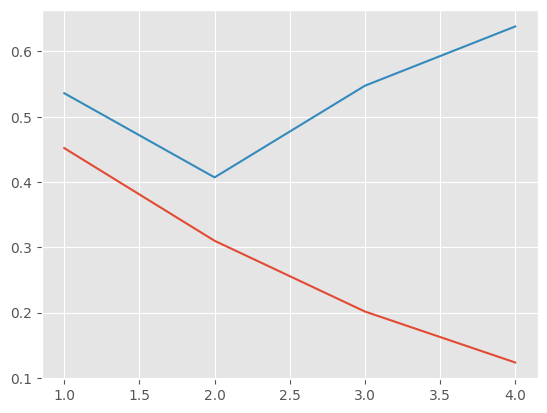

In [28]:

# plot train and validation loss after each epoc to select the best epoc #
train_loss_4 = [ 0.4520035521622668, 0.3100675621089783, 0.2017144214738398, 0.12366056950525084]
val_loss_4 = [0.5360510672660584,0.40714715294381404, 0.5475284856684665, 0.6382943654948092]
plt.plot([1,2,3,4],train_loss_4)
plt.plot([1,2,3,4],val_loss_4)

# overfitting if more than 2 epoc；
# use 2 epocs

# 4. Evaluation on Validation set

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay,roc_curve

In [81]:
softmax([-2.412001609802246, 2.7766621112823486])

array([0.0055485, 0.9944515])

In [72]:
# record the predict results from validation from each epoc

len(val_labels), len(val_predict), len(val_proba), len(val_da)

(1501, 1501, 1501, 1501)

In [59]:
# accurancy
acc = np.sum((np.array(val_labels) == np.array(val_predict)))/len(val_labels)
acc

0.8414390406395736

In [60]:
print(classification_report(val_labels, val_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       856
           1       0.83      0.80      0.81       645

    accuracy                           0.84      1501
   macro avg       0.84      0.84      0.84      1501
weighted avg       0.84      0.84      0.84      1501



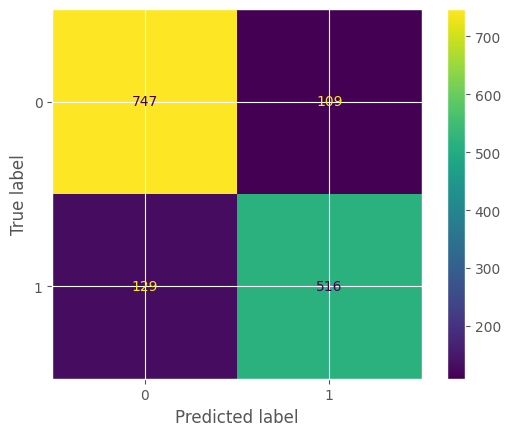

In [61]:
ConfusionMatrixDisplay(confusion_matrix(val_labels, val_predict)).plot()


In [85]:
val_proba[:3]

[[-2.412001609802246, 2.7766621112823486],
 [-2.552046060562134, 2.988494634628296],
 [-2.468845844268799, 2.855006456375122]]

In [88]:
def softmax(x):
    return (np.exp(x-np.max(x)))/(np.exp(x-np.max(x)).sum())

y_proba = [  softmax(prob).tolist()  for prob in val_proba ]
y_proba[:2]


[[0.005548499927367589, 0.9944515000726324],
 [0.003909063611714752, 0.9960909363882853]]

In [98]:
val_labels.sum

(1501, 1501)

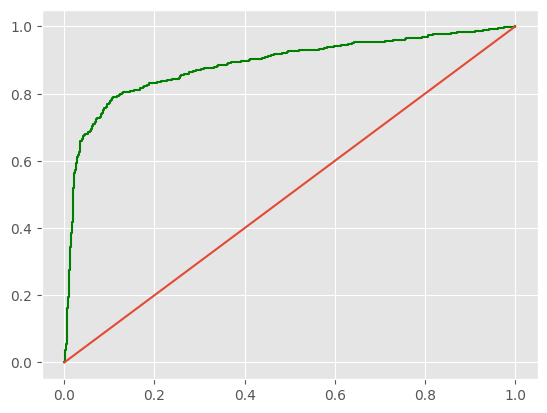

In [101]:
# ROC_AUC
fpr, tpr, thresholds = roc_curve(val_labels, np.array(y_proba)[:, 1])
plt.plot(fpr, tpr, color='green')
plt.plot([0,1], [0,1])
plt.show()

# 5. predict on test data

In [55]:
# TODO
# similar with previous process

3002

In [ ]:
# 

# 6 Conclusion

1. Without any preprocessing, the accuracy of the model reaches ~ 84%. It has a good performance.
2. With careful preprocessing, the model may be improved
3. With more data, the model may be improved.